# **Diabetes Prediction Model**

# Install all key packages

In [61]:
#Install all key packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration:
from sklearn.preprocessing import MinMaxScaler

# Supervised learning:
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     KFold, GridSearchCV, StratifiedKFold)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            cohen_kappa_score, confusion_matrix, f1_score, 
                            ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn.naive_bayes import (BernoulliNB, ComplementNB, GaussianNB, 
                                MultinomialNB)
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.metrics import cohen_kappa_score, make_scorer
from numpy.core.numeric import cross
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Unsupervised learning:
from sklearn.decomposition import PCA
from numpy.linalg import svd
from sklearn.cluster import KMeans

# Part 1: Describe your data  



**1. Desribe your dataset in 3-4 sentences**

*Our original dataset contains 8 features and 1 label, with a total of 768 patient-level observations. The data was collected by the National Institute of Diabetes and Digestive and Kidney Diseases.*


*During data preprocessing, we removed 44 patients which we identified as outliers, leaving a remaining 724 patients included in our model's train & test datasets.*

**2. What research question are you trying to answer?**

*Which of the patient's medical features are most predictive of the patient being diagnosed with diabetes?*

**3. What are your features? How many are there in total?**

*There are 8 features in this dataset, they include 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age'.*
- **Pregnancies:** Number of times the patient has been pregnant.
- **Glucose:** Numerical plasma glucose concentration (oral test). Healthy plasma glucose levels are between 100-140 mg/dL.
- **BloodPressure:** Numerical diastolic blood pressure. Healthy diastolic blood pressure is less than 80 mmHg.
- **SkinThickness:** Numerical skin fold thickness at tricep. Healthy female skin thickness is 23mm.
- **Insulin:** Numerical insulin level (2 hour glucose test). Healthy insulin level is 16-116 mIU/ml.
- **BMI:** Body mass index number (weight in kg/(height in m)^2). Healthy BMI is 18-25.
- **DiabetesPedigreeFunction:** Numerical score of frequency of diabetes history in relatives. Lower numbers mean fewer family members with diabetes.
- **Age:** Number of years old the patient is.

**4. What is your label?**

*Outcome: Binary variable, 0 or 1. 0 means no diabetes, 1 means diagnosed diabetes.*

**5. If your label is a continuous variable, how will you dichtomoize it (i.e., turn it into a 0/1 indicator)?**

*Our label is already dichotomized (it is binary)*

**6. Please provide a hypothesis as to what you believe the relationship between your features and label to be? Please provide a justficiation for your hypothesis**

*Our first hypothesis is that a patient with a high blood pressure (especially chronic hypertension) will be more likely to have diabetes than a patient with a lower, healthier blood pressure, because people who have diabetes are more likely to have high blood pressure as diabetes causes the walls of the blood vessels to stiffen.*

*Our second hypothesis is that a patient with a higher glucose level will be more likely to have diabetes than a patient with a lower, healthier glucose level, since diabetes involves the pancreas being unable to secrete insulin, the substance that breaks down glucose in the bloodstream.*

*Our third hypothesis is that an older patient will be more likely to have diabetes than a younger patient, since the older a person gets the slower their metabolism rate.*

# Part 2: Data Exploration

**1. Import data set. Show the first five rows of data**

In [62]:
# Download the file
!wget --no-check-certificate'https://docs.google.com/uc?export=download&id=1rbSX3QIOTXVXo6f8Dza-lhEB3ZX8Unqy' -O diabetes_data.csv

wget: unrecognized option '--no-check-certificatehttps://docs.google.com/uc?export=download&id=1rbSX3QIOTXVXo6f8Dza-lhEB3ZX8Unqy'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [63]:
# Read the csv file. Display the first 5 rows
df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
# Inspect whether there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
# Inspect data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

After we inspected our data, we noticed there are 0s in features Glucose, Bloodpressure, BMI, and Age, which is not reasonable since these features should be bigger than 0. We think these might be **potential missing values**, so we removed them from our dataset. The final dataframe to be used is displayed as below.

In [66]:
missing_value = df.loc[(df['Glucose'] == 0)| (df['BloodPressure'] == 0) |
                       (df['BMI'] == 0)|(df['Age'] == 0),:]
df = df.drop(index=missing_value.index).reset_index().drop(columns = 'index')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2. Display dimension of the data**

Shape of our dataframe: 724 observations, 8 features, 1 label

In [67]:
#insert code here
df.shape

(724, 9)

**3. Summarize the data to see the distribution of data**

The descriptive statistics for featuers as well as label are displayed below.

It should be worth noting that, the mean value of our label ***Outcome*** is 34.39%, which means that 34.39% of the total observations are diagnosed diabetes. We can tell this is an imbalanced dataset.

In [68]:
#insert code here
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**4. Display the boxplots of your data**

Since our label is a binary variable instead of a continuous variable, using boxplot to describe our label does not provide much information. So for this question, **we will only display boxplots of our features**.

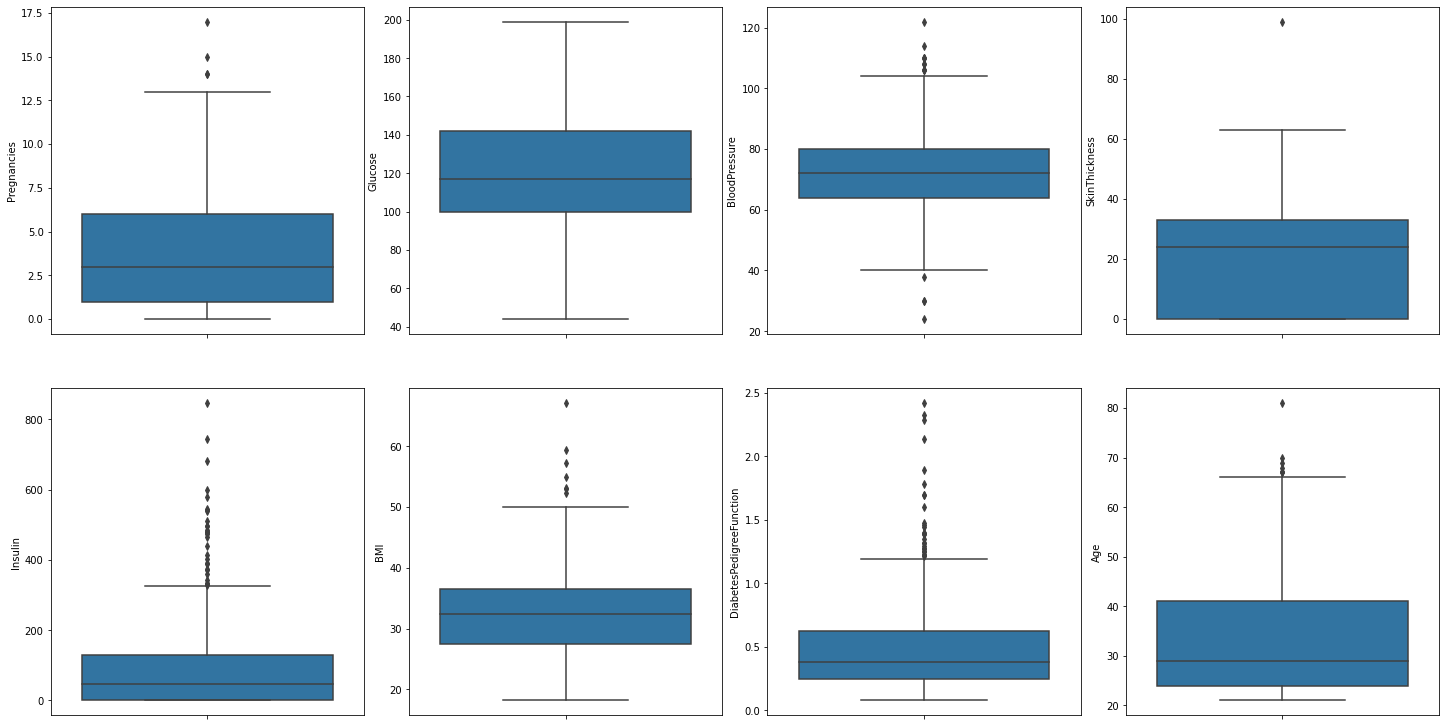

In [69]:
# insert code here
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.drop(columns='Outcome').items():
    sns.boxplot(y=k, data= df.drop(columns='Outcome'), ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**5. Based on your boxplots in Q4, do any of your variables appear to have outliers? If yes, which ones?**

Yes, there are outliers in *Pregnancies, BloodPressure, Insulin, BMI, and DiabetesPedigreeFunction*

**6. Write a program to show exactly what percentage of data are outliers (outliers are defined as variable 1.5 standard deviations above and below the IQR)**

In [70]:
#insert code here
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Pregnancies outliers = 0.55%
Column Glucose outliers = 0.00%
Column BloodPressure outliers = 2.35%
Column SkinThickness outliers = 0.14%
Column Insulin outliers = 4.01%
Column BMI outliers = 0.97%
Column DiabetesPedigreeFunction outliers = 3.87%
Column Age outliers = 0.97%
Column Outcome outliers = 0.00%


**7. Based on the program you wrote in Q6, which variables have a large percentage of outliers?**

By applying a **threshold of 3%**, features with the a large percentage of outliers are **Insulin (4.01%)**, followed by **DiabetesPedigreeFunction (3.87%)**. The rest features have relatively small portions of outliers.

**8. Visualize the distributions of all of your variables (i.e., display histograms)**

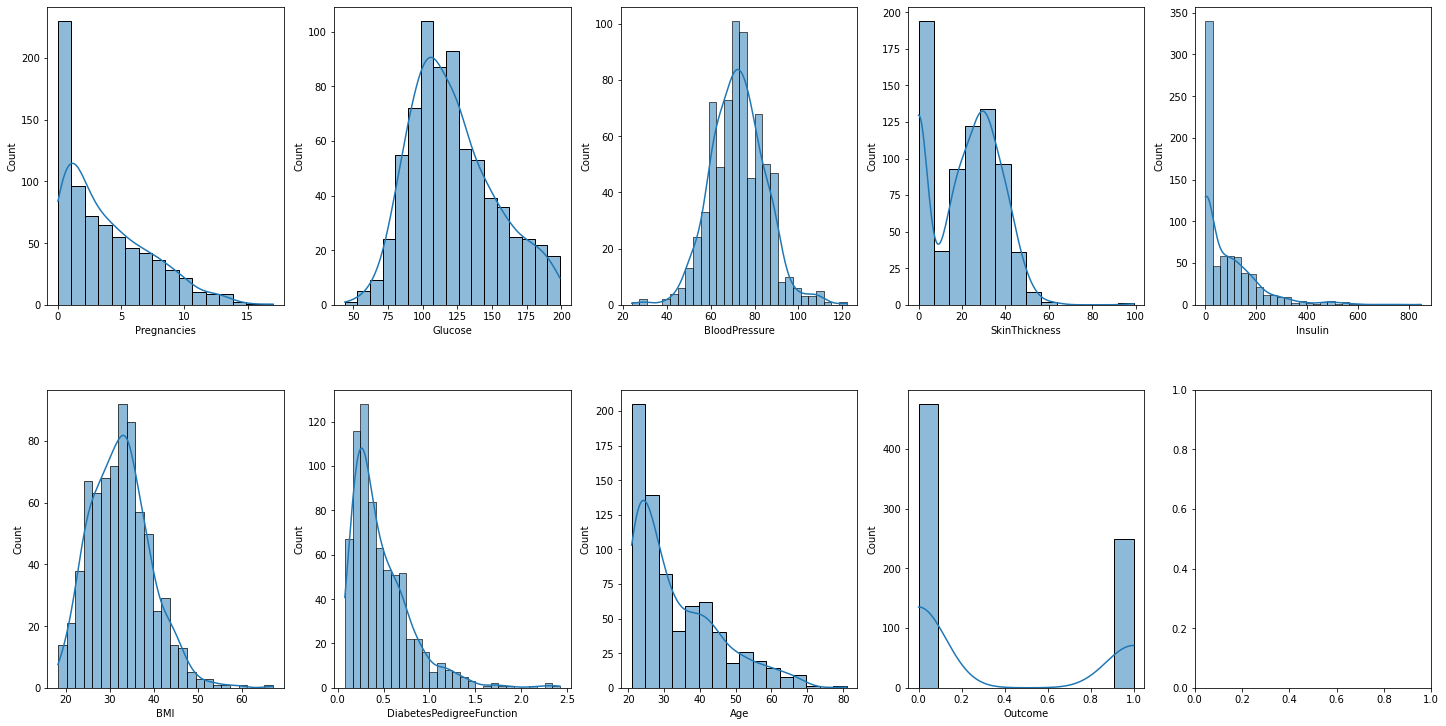

In [71]:
#insert code here
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
#df_plot = df[]
for k,v in df.items():
    sns.histplot(v, kde=True,ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**9. What do you notice about the scale for your features?**

Scales of our features vary. They need to be standardized

**10. Standardize your features only and display distributions for all variables (features + Label)?**

In [72]:
#insert code here
feature_set = df.loc[:,list(df.columns)[:-1]]
label = df['Outcome']
column_names = list(df.columns)[:-1]

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(feature_set)
feature_set = pd.DataFrame(scaler.transform(feature_set))
feature_set.columns = column_names

df_standardized = feature_set.copy()
df_standardized['label'] = label
df_standardized.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000,1


**11. Visualize the distributions of all of your standardized variables (i.e., display histograms)**

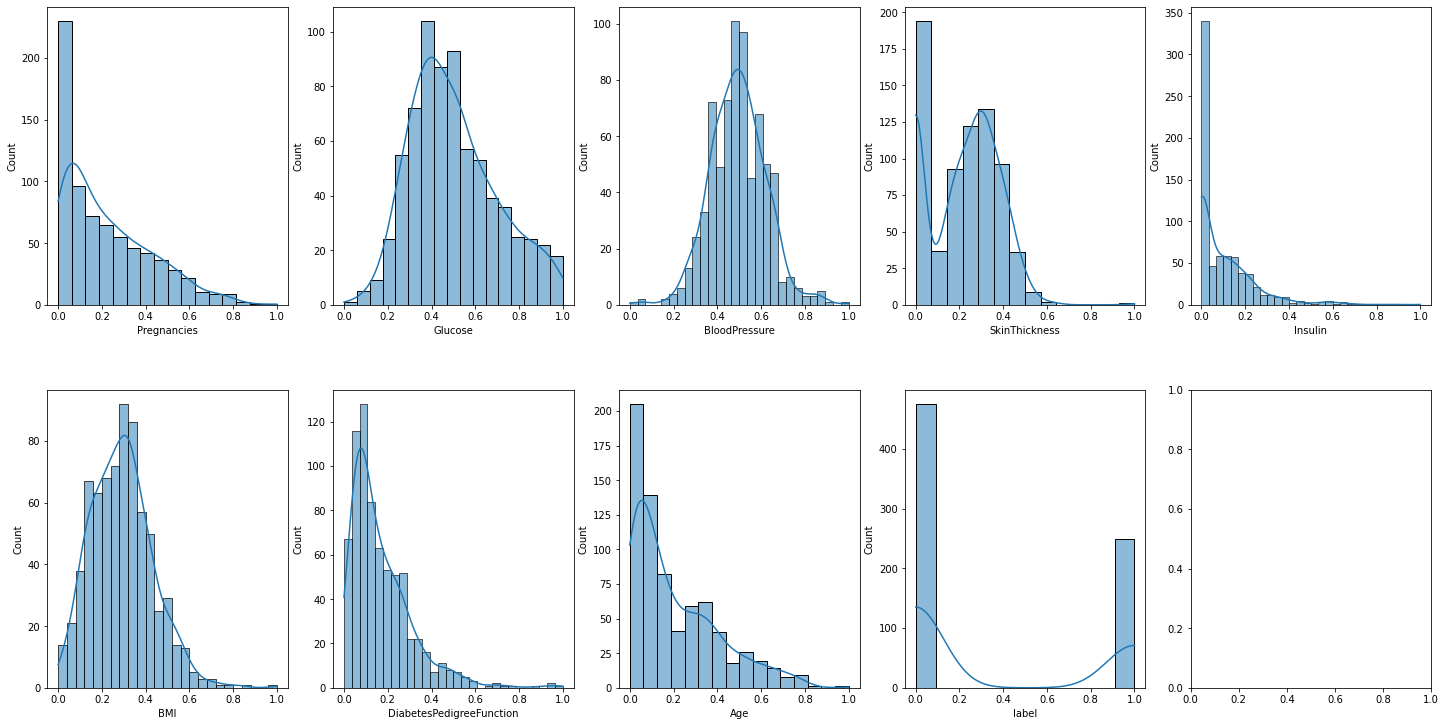

In [73]:
#insert code here
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_standardized.items():
    sns.histplot(v, kde=True, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**12. Which variables appear to be normally distributed? Which are left- vs. right-skewed? Which variables have a bimodal distribution?**

* Normal distributed: Glucose, Blood Pressure and BMI.
* Right-skewed: Pregnancy, Diabetes Pedigree Function, Insulin and Age. 
* Bimodal: Skin Thickness.

**13. Display a correlation matrix for all of your variables (both labels and features)**

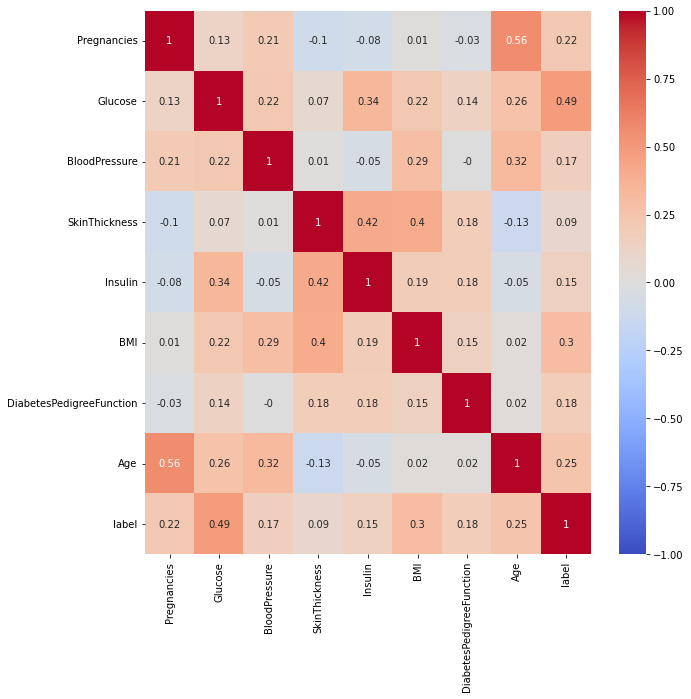

In [74]:
figure = plt.figure(figsize = (10, 10))

corr_matrix = df_standardized.corr().round(2)
sns.heatmap(data = corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

**14. Which features are most correlated with your label?**

Using a **cut-off of 0.3**, **Glucose (0.49) and BMI (0.3)** are most correlated with our label.

**15. Which features are most correlated with each other?**

Using a **cut-off of 0.4**:
* **Age and Pregnancies** are most correlated (0.56).
* **Insulin and Skin thickness** are second-highly correlated (0.42)
* **BMI and Skin thickness** are third-highly correlated (0.4)

**16. What does feature correlation raise concerns of? What is one (unsupervised learning) method that will ensure no features are correlated?**

It raises concern of **multicollinearity**. We can use **PCA (Principal Component Analysis)** to deal with this problem.

**18. Visualize a scatterplot of your features and labels. One plot per feature. X-axis should display the feature. y-axis the label?**

Since our label is a binary variable instead of a continuous variable, we will do boxplots side by side for each feature.

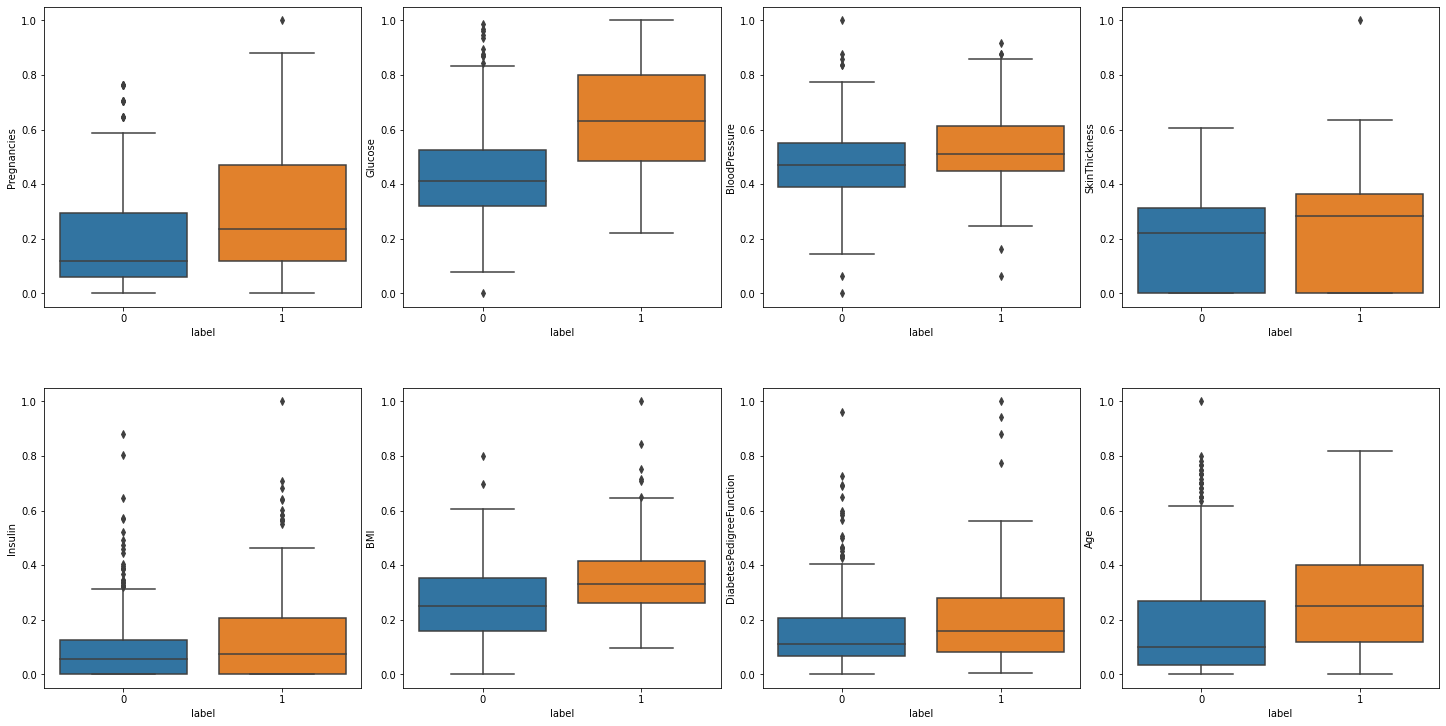

In [75]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_standardized.items():
  if index <= 7:
    sns.boxplot(x = "label",y=k, data=df_standardized, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**18. Based on your exploratory analysis, if you had to select a subset of features, which features would you select going forward? Please provide a justification.**

The subset of features we would choose to go forward: Pregnancies, Glucose, BloodPressure, BMI, Age.

* **High correlation with our label (More than 0.17)**: These features have relatively high correlations with our label.
* **Statistical differences between label = 0 or label 1**: As we can see from Q17, the distributions of these features when label = 0 versus label = 1 are very different, with different means, std etc. This is a hint that these features might have predictive powers over our label.
* **Relatively objective features**: Most of these features are relatively objective, since they are based on measurement/observation instead of self-report.

# Part 3: Supervised learning 

## Baseline Model: Hold one out (80/20 train/test split) 

In [76]:
# Separating data into training and test
x= df_standardized.drop('label', axis=1)
y= df_standardized['label']
# Set the train set to 80% and random_state to 0 for reproducibility
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.20, 
                                                   random_state=0) 


In [77]:
# Initialize the classificators
log=LogisticRegression(solver= 'liblinear', random_state=0) 
# Use the liblinear solver because the dataset used is small and unstandardized
svm= SVC(random_state=0)
tree= DecisionTreeClassifier(random_state=0) 
forest= RandomForestClassifier(random_state=0)
cnb=ComplementNB()
adb=AdaBoostClassifier(random_state=0)

# Create a list with the objects 
models= [log, svm, tree, forest, cnb, adb]

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # Get the accuracy score
    kappa_scores= cohen_kappa_score(y_test, y_pred) # Get the cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}") 
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.79
The kappa score of model LogisticRegression is 0.51


The accuracy of model SVC is 0.78
The kappa score of model SVC is 0.51


The accuracy of model DecisionTreeClassifier is 0.71
The kappa score of model DecisionTreeClassifier is 0.35


The accuracy of model RandomForestClassifier is 0.74
The kappa score of model RandomForestClassifier is 0.41


The accuracy of model ComplementNB is 0.67
The kappa score of model ComplementNB is 0.36


The accuracy of model AdaBoostClassifier is 0.78
The kappa score of model AdaBoostClassifier is 0.51




## 5-fold cross-validation (80/20 train/test split)

In [78]:
# Separating data into training and test
x= df_standardized.drop('label', axis=1)
y= df_standardized['label']
# Set the train set to 80% and random_state to 0 for reproducibility
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.20, 
                                                   random_state=0) 

In [79]:
# Initialize the classificators
log=LogisticRegression(solver= 'liblinear', random_state=0) 
# Use the liblinear solver because the dataset used is small and unstandardized
svm= SVC(random_state=0)
tree= DecisionTreeClassifier(random_state=0) 
forest= RandomForestClassifier(random_state=0)
cnb=ComplementNB()
adb=AdaBoostClassifier(random_state=0)

# Create a list with the objects 
models= [log, svm, tree, forest, cnb, adb]
# Use make_scorer to return a callable cohen kappa score
kappa_scorer = make_scorer(cohen_kappa_score)

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= np.mean(cross_val_score(model, x, y, cv=5)) 
    # Use cross_val_score to evaluate score by cross validation
    # Use cv=5 for 5 folds 
    # Get accuracy score
    kappa_scores= np.mean(cross_val_score(model, x, y, cv=5, 
                                          scoring= kappa_scorer)) 
    # Replicating cross_val_score from above
    # Get cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.77
The kappa score of model LogisticRegression is 0.46


The accuracy of model SVC is 0.77
The kappa score of model SVC is 0.45


The accuracy of model DecisionTreeClassifier is 0.69
The kappa score of model DecisionTreeClassifier is 0.31


The accuracy of model RandomForestClassifier is 0.77
The kappa score of model RandomForestClassifier is 0.46


The accuracy of model ComplementNB is 0.65
The kappa score of model ComplementNB is 0.27


The accuracy of model AdaBoostClassifier is 0.77
The kappa score of model AdaBoostClassifier is 0.47




## 10-fold cross-validation (80/20 train/test split)

In [80]:
# Separating data into training and test
x= df_standardized.drop('label', axis=1)
y= df_standardized['label']
# Set the train set to 80% and random_state to 0 for reproducibility
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.20, 
                                                   random_state=0) 

In [81]:
# Initialize the classificators
log=LogisticRegression(solver= 'liblinear', random_state=0) 
# Use the liblinear solver because the dataset used is small and unstandardized
svm= SVC(random_state=0)
tree= DecisionTreeClassifier(random_state=0) 
forest= RandomForestClassifier(random_state=0)
cnb=ComplementNB()
adb=AdaBoostClassifier(random_state=0)

# Create a list with the objects 
models= [log, svm, tree, forest, cnb, adb]
# Use make_scorer to return a callable cohen kappa score
kappa_scorer = make_scorer(cohen_kappa_score)

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= np.mean(cross_val_score(model, x, y, cv=10)) 
    # Use cross_val_score to evaluate score by cross validation
    # Use cv=10 for 10 folds 
    # Get accuracy score
    kappa_scores= np.mean(cross_val_score(model, x, y, cv=10, 
                                          scoring= kappa_scorer)) 
    # Replicating cross_val_score from above
    # Get cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.77
The kappa score of model LogisticRegression is 0.46


The accuracy of model SVC is 0.77
The kappa score of model SVC is 0.45


The accuracy of model DecisionTreeClassifier is 0.69
The kappa score of model DecisionTreeClassifier is 0.33


The accuracy of model RandomForestClassifier is 0.77
The kappa score of model RandomForestClassifier is 0.46


The accuracy of model ComplementNB is 0.65
The kappa score of model ComplementNB is 0.28


The accuracy of model AdaBoostClassifier is 0.74
The kappa score of model AdaBoostClassifier is 0.41




## 10-fold stratified cross-validation (80/20 train/test split)

In [82]:
# Train and test sets defined in previous code block
# Initialize the classificators
log=LogisticRegression(solver= 'liblinear', random_state=0) 
# Use the liblinear solver because the dataset used is small and unstandardized
svm= SVC(random_state=0)
tree= DecisionTreeClassifier(random_state=0) 
forest= RandomForestClassifier(random_state=0)
cnb=ComplementNB()
adb=AdaBoostClassifier(random_state=0)

# Create a list with the objects 
models= [log, svm, tree, forest, cnb, adb]
# Use make_scorer to return a callable cohen kappa score
kappa_scorer = make_scorer(cohen_kappa_score)
# Creating variable strat containing the startified kfold function with 10 folds
strat = StratifiedKFold(n_splits=10)

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= np.mean(cross_val_score(model, x, y, cv=strat)) 
    # Use cross_val_score to evaluate score by cross validation
    # Use cv=strat for stratified 10 folds 
    # Get accuracy score
    kappa_scores= np.mean(cross_val_score(model, x, y, cv=strat, 
                                          scoring= kappa_scorer)) 
    # Replicating cross_val_score from above
    # Get cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.77
The kappa score of model LogisticRegression is 0.46


The accuracy of model SVC is 0.77
The kappa score of model SVC is 0.45


The accuracy of model DecisionTreeClassifier is 0.69
The kappa score of model DecisionTreeClassifier is 0.33


The accuracy of model RandomForestClassifier is 0.77
The kappa score of model RandomForestClassifier is 0.46


The accuracy of model ComplementNB is 0.65
The kappa score of model ComplementNB is 0.28


The accuracy of model AdaBoostClassifier is 0.74
The kappa score of model AdaBoostClassifier is 0.41




## 10-fold cross-validation with subset of features identified above (80/20 train/test split)

In [83]:
# Separating data into training and test
#Use a subset of the features identified in Part 2
x= df_standardized.loc[:, ["BloodPressure", "Glucose", "Age"]] 
y= df_standardized['label']
# Set the train set to 80% and random_state to 0 for reproducibility
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.20, 
                                                   random_state=0) 

In [84]:
# Initialize the classificators
log=LogisticRegression(solver= 'liblinear', random_state=0) 
# Use the liblinear solver because the dataset used is small and unstandardized
svm= SVC(random_state=0)
tree= DecisionTreeClassifier(random_state=0) 
forest= RandomForestClassifier(random_state=0)
cnb=ComplementNB()
adb=AdaBoostClassifier(random_state=0)

# Create a list with the objects 
models= [log, svm, tree, forest, cnb, adb]
# Use make_scorer to return a callable cohen kappa score
kappa_scorer = make_scorer(cohen_kappa_score)

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= np.mean(cross_val_score(model, x, y, cv=10)) 
    # Use cross_val_score to evaluate score by cross validation
    # Use cv=10 for 10 folds 
    # Get accuracy score
    kappa_scores= np.mean(cross_val_score(model, x, y, cv=10, 
                                          scoring= kappa_scorer)) 
    # Replicating cross_val_score from above
    # Get cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.75
The kappa score of model LogisticRegression is 0.40


The accuracy of model SVC is 0.77
The kappa score of model SVC is 0.44


The accuracy of model DecisionTreeClassifier is 0.64
The kappa score of model DecisionTreeClassifier is 0.22


The accuracy of model RandomForestClassifier is 0.72
The kappa score of model RandomForestClassifier is 0.36


The accuracy of model ComplementNB is 0.69
The kappa score of model ComplementNB is 0.35


The accuracy of model AdaBoostClassifier is 0.75
The kappa score of model AdaBoostClassifier is 0.40




## 80/20 Holdout With Subset of Commonly known Features

In [85]:
# Separating data into training and test
#Use a subset of the features identified in Part 2
x= df.loc[:, ["Glucose", "BMI","Age"]] 
y= df['Outcome']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.20, 
                                                   random_state=0)

In [86]:
# Initialize the classificators
log=LogisticRegression(solver= 'liblinear', random_state=0) 
# Use the liblinear solver because the dataset used is small and unstandardized
svm= SVC(random_state=0)
tree= DecisionTreeClassifier(random_state=0) 
forest= RandomForestClassifier(random_state=0)
cnb=ComplementNB()
adb=AdaBoostClassifier(random_state=0)

# Create a list with the objects 
models= [log, svm, tree, forest, cnb, adb]

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # Get the accuracy score
    kappa_scores= cohen_kappa_score(y_test, y_pred) # Get the cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}") 
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.79
The kappa score of model LogisticRegression is 0.50


The accuracy of model SVC is 0.77
The kappa score of model SVC is 0.45


The accuracy of model DecisionTreeClassifier is 0.66
The kappa score of model DecisionTreeClassifier is 0.27


The accuracy of model RandomForestClassifier is 0.79
The kappa score of model RandomForestClassifier is 0.54


The accuracy of model ComplementNB is 0.53
The kappa score of model ComplementNB is 0.06


The accuracy of model AdaBoostClassifier is 0.81
The kappa score of model AdaBoostClassifier is 0.57




### Saving the best model

In [87]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(log)

# Then we will be loading that saved model
log_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
log_from_pickle.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [88]:
log.fit(x_train.values, y_train.values)
data_pred = log.predict(x_test.values)

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
log.predict([[148,33.6,50]]) #Checking whether the model predicts accurately

array([1])

### Create ROC curve

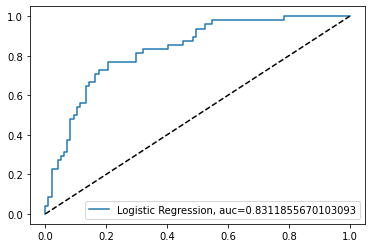

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = log.predict_proba(x_test.values)[::,1]
fpr, tpr, _ = roc_curve(y_test.values,  y_pred_proba)
auc = roc_auc_score(y_test.values, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.plot([0,1],[0,1],color="black",linestyle="--")
plt.legend(loc=4)
plt.show()

### Create confusion matrix

In [92]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

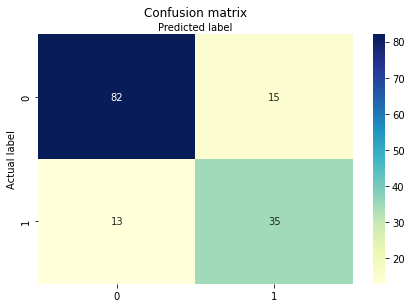

In [93]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
# Checking precision and recall scores
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Precision: 0.7
Recall: 0.7291666666666666


## With Hyperparameter Tuning

In [95]:
# Separating data into training and test
x= df_standardized.drop('label', axis=1)
y= df_standardized['label']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.20, random_state=0) # Set the train set to 80% and random_state to 0 for reproducibility

## First Set of Hyperparameters

In [96]:
# Use GridSearchCV to find best set of hyperparameters for Decision Tree Classifier
# Create a dictionary with the options, to serve as the "parameter grid".

clf= DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini','entropy'],
    'min_samples_leaf' : [10, 100]
    }

# Set CV to 5, verbose to 1, and n_jobs to -1 so it doesn't take forever.
gridF = GridSearchCV(clf, grid_param, cv=10, verbose = 1, n_jobs = -1)

# Get best fit model by fitting results of the gridsearch to the training data 
bestF = gridF.fit(x_train, y_train)

# Get the y predicted values.
y_pred = bestF.predict(x_test)

print('Parameters: ', gridF.best_params_)
print('Accuracy score: ', gridF.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Parameters:  {'criterion': 'gini', 'min_samples_leaf': 100}
Accuracy score:  0.7461282516636418


In [97]:
# Use GridSearchCV to find best set of hyperparameters for Random Forest Classifier
# Create a dictionary with the options, to serve as the "parameter grid".

clf= RandomForestClassifier()

grid_param = {
    'criterion': ['gini','entropy'],
    'min_samples_split' : [5, 10]
    }

# Set CV to 5, verbose to 1, and n_jobs to -1 so it doesn't take forever.
gridF = GridSearchCV(clf, grid_param, cv=10, verbose = 1, n_jobs = -1)

# Get best fit model by fitting results of the gridsearch to the training data 
bestF = gridF.fit(x_train, y_train)

# Get the y predicted values.
y_pred = bestF.predict(x_test)

print('Parameters: ', gridF.best_params_)
print('Accuracy score: ', gridF.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Parameters:  {'criterion': 'entropy', 'min_samples_split': 10}
Accuracy score:  0.7840592861464005


In [98]:
from sklearn.naive_bayes import GaussianNB

# Initialize the classificators
log=LogisticRegression(penalty='l2',solver= 'liblinear', random_state=0) # Use the hyperparameter penalty=l2 alongside liblinear solver
svm= SVC(kernel="poly", random_state=0) # Use the hyperparameter kernel=poly
tree= DecisionTreeClassifier(criterion='gini', min_samples_leaf=100, random_state=0) # Use the hyperparameter criterion=gini and min_samples_leaf=100 as identified above using GridSearchCV
forest= RandomForestClassifier(criterion='gini',min_samples_split=5, random_state=0) # Use the hyperparameter criterion=gini and min_samples_split=5 as identified above using GridSearchCV
gnb= GaussianNB() # Change the Naive Bayes model from Complement to Gaussian with default values
adb=AdaBoostClassifier(n_estimators=100, random_state=0) # Use hyperparameter n_estimators=100 

# Create a list with the objects 
models= [log, svm, tree, forest, gnb, adb]
# Use make_scorer to return a callable cohen kappa score
kappa_scorer = make_scorer(cohen_kappa_score)

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= np.mean(cross_val_score(model, x, y, cv=10)) # Use cross_val_score to evaluate score by cross validation
                                                           # Use cv=10 for 10 folds 
                                                           # Get accuracy score
    kappa_scores= np.mean(cross_val_score(model, x, y, cv=10, scoring= kappa_scorer)) # Replicating cross_val_score from above
                                                                                      # Get cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.77
The kappa score of model LogisticRegression is 0.46


The accuracy of model SVC is 0.77
The kappa score of model SVC is 0.46


The accuracy of model DecisionTreeClassifier is 0.73
The kappa score of model DecisionTreeClassifier is 0.37


The accuracy of model RandomForestClassifier is 0.76
The kappa score of model RandomForestClassifier is 0.46


The accuracy of model GaussianNB is 0.75
The kappa score of model GaussianNB is 0.45


The accuracy of model AdaBoostClassifier is 0.75
The kappa score of model AdaBoostClassifier is 0.43




## Second Set of Hyperparameters

In [99]:
# Initialize the classificators
log=LogisticRegression(penalty='l1', solver='liblinear', random_state=0) # Use the hyperparameter penalty=l1 alongside liblinear solver
svm= SVC(kernel="linear", random_state=0) # Use the hyperparameter kernel=linear
tree= DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf = 100, random_state=0) # Use the hyperparameter criterion=entropy and keep min_samples_leaf=100
forest= RandomForestClassifier(criterion= 'entropy', min_samples_split= 5,random_state=0) # Use the hyperparameter criterion=entropy and keep min_samples_split=5 
mnb=MultinomialNB(alpha=1.0, fit_prior=True) # Change the Naive Bayes model from Complement to Multinomial with default values
adb=AdaBoostClassifier(algorithm='SAMME', random_state=0) # Use hyperparameter algorithm= SAMME

# Create a list with the objects 
models= [log, svm, tree, forest, mnb, adb]
# Use make_scorer to return a callable cohen kappa score
kappa_scorer = make_scorer(cohen_kappa_score)

# Use a for loop to fit models and generate predictions
for model in models:
    model.fit(x_train, y_train) # Fit the model
    y_pred= model.predict(x_test) # Predict on the test set
    accuracy= np.mean(cross_val_score(model, x, y, cv=10)) # Use cross_val_score to evaluate score by cross validation
                                                           # Use cv=10 for 10 folds 
                                                           # Get accuracy score
    kappa_scores= np.mean(cross_val_score(model, x, y, cv=10, scoring= kappa_scorer)) # Replicating cross_val_score from above
                                                                                      # Get cohen kappa score
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f"The kappa score of model {type(model).__name__} is {kappa_scores:.2f}")
    print("\n")

The accuracy of model LogisticRegression is 0.77
The kappa score of model LogisticRegression is 0.46


The accuracy of model SVC is 0.77
The kappa score of model SVC is 0.46


The accuracy of model DecisionTreeClassifier is 0.75
The kappa score of model DecisionTreeClassifier is 0.42


The accuracy of model RandomForestClassifier is 0.77
The kappa score of model RandomForestClassifier is 0.47


The accuracy of model MultinomialNB is 0.66
The kappa score of model MultinomialNB is 0.00


The accuracy of model AdaBoostClassifier is 0.76
The kappa score of model AdaBoostClassifier is 0.44




In [100]:
# Note that Multinomial Naive Bayes has a cohen's kappa of 0 because the 
# Multinomial classifier is used for text analysis since it maintains 
# word counts. It is not suited to discrete numerical data.

### Comparing all models

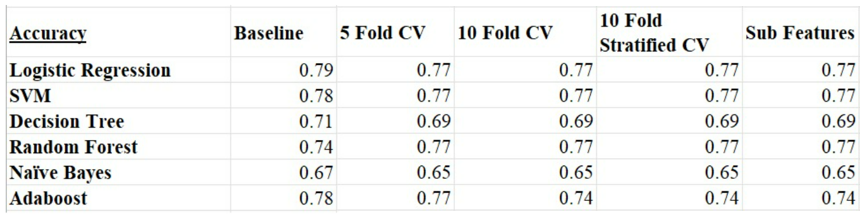

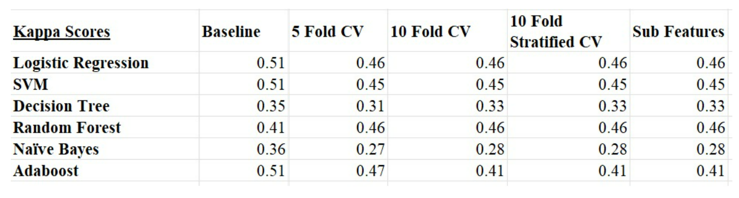

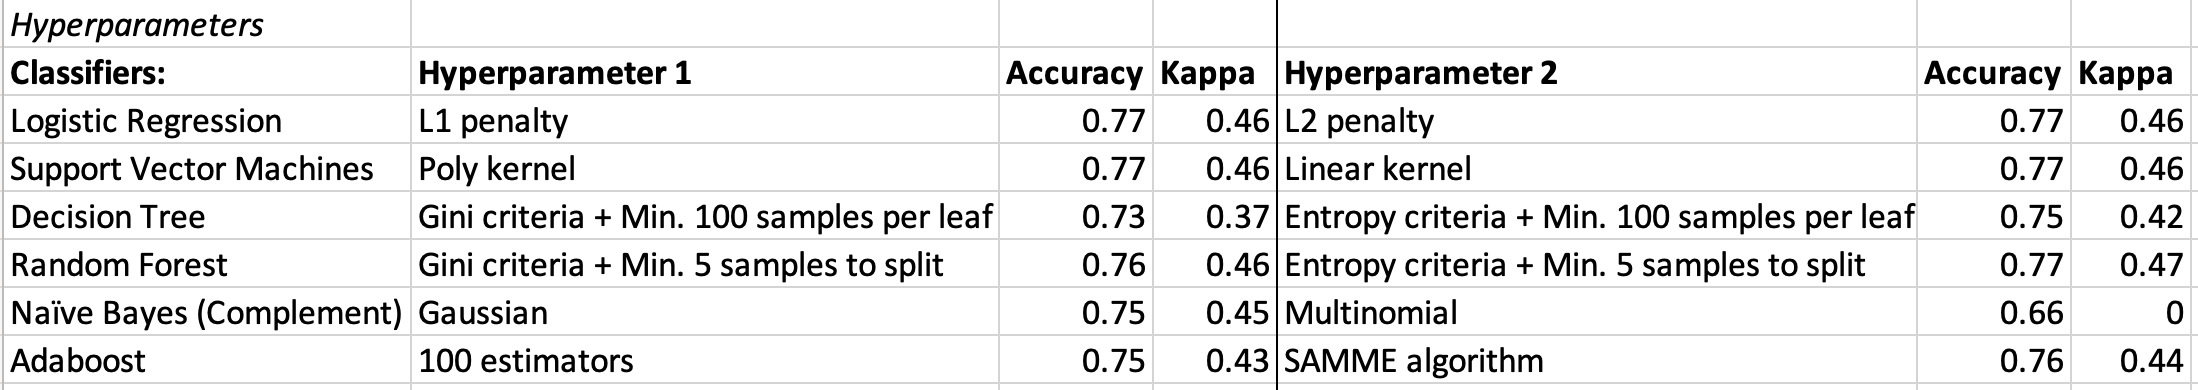

**Overall, which model performed the best?**

*Overall, the logistic regression hold-one-out model performed the best on both accuracy and cohen's kappa score.*

# Part 4: Unsupervised learning

##PCA

**Using principal component analysis, generate a dimensionality-reduced representation of the dataset.** 


In [101]:
# PCA fit and transformation
X = df_standardized.drop(columns = 'label')

pca = PCA(n_components=8) # The number of all features is 8
X_pca = pca.fit_transform(X)
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(pca.explained_variance_ratio_)

In [102]:
# Calculate variance explained
for i in range(2,9):
  print("Number of components: ", i)
  print("Variances explained by each component (by sequence): ", explained_variance_ratios[0:i].round(4))
  print("Total variance explained", cum_evr[i-1].round(4))
  print('--------------------------------------------------------------------------------')

Number of components:  2
Variances explained by each component (by sequence):  [0.3132 0.224 ]
Total variance explained 0.5372
--------------------------------------------------------------------------------
Number of components:  3
Variances explained by each component (by sequence):  [0.3132 0.224  0.1275]
Total variance explained 0.6647
--------------------------------------------------------------------------------
Number of components:  4
Variances explained by each component (by sequence):  [0.3132 0.224  0.1275 0.0887]
Total variance explained 0.7535
--------------------------------------------------------------------------------
Number of components:  5
Variances explained by each component (by sequence):  [0.3132 0.224  0.1275 0.0887 0.0844]
Total variance explained 0.8378
--------------------------------------------------------------------------------
Number of components:  6
Variances explained by each component (by sequence):  [0.3132 0.224  0.1275 0.0887 0.0844 0.0722]
Tot

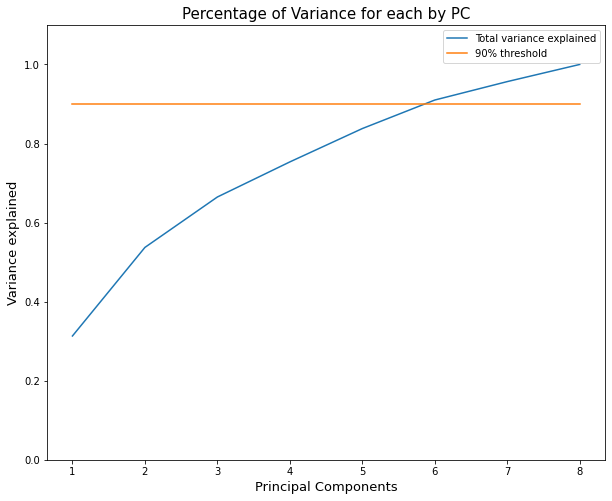

In [103]:
# Visualize variance explained

plt.figure(figsize = (10,8))
plt.plot(np.arange(1, 9), cum_evr, label = 'Total variance explained')
plt.plot(np.arange(1, 9), [0.9]*8, label = '90% threshold')
plt.title('Percentage of Variance for each by PC', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 13)
plt.ylabel('Variance explained', fontsize = 13)
plt.ylim(0,1.1)
plt.legend()
plt.show()

**Vary the number of components from 2 to 10. What percentage of variance is explained at each number of components?** 
Modified version: Since we only have 8 features, we will look at the percentage of variance explained from 2 to 8.

Total variance explained at each number of components:

2 Components: 52.38%

3 Components: 64.2%

4 Components: 74.55%

5 Components: 83.29%

6 Components: 90.5%

7 Components: 96.04%

8 Components: 100%

**Set the number of components to 2. Which features load together with high weight in each component?**

In [104]:
#Set the PCA components number to 2
pca=PCA(n_components=2)
#PCA fit and transformation
x_pca = pca.fit_transform(X)
x_pca

array([[ 0.31673442,  0.05977329],
       [-0.25632961, -0.1478135 ],
       [ 0.27080111, -0.0326775 ],
       ...,
       [-0.01320604, -0.05966621],
       [ 0.03248998, -0.1559692 ],
       [-0.30777612, -0.06096973]])

In [105]:
# Create the x_pca dataframe
x_pca_df=pd.DataFrame(x_pca)
x_pca_df['label'] = df_standardized['label']
x_pca_df.columns = ['component_1','component_2','label']
x_pca_df

,component_1,component_2,label
0,0.316734,0.059773,1
1,-0.256330,-0.147814,0
2,0.270801,-0.032678,1
3,-0.347212,-0.094445,0
4,-0.128783,0.462513,1
...,...,...,...
719,0.472908,-0.110542,0
720,-0.139495,0.047931,0
721,-0.013206,-0.059666,0
722,0.032490,-0.155969,1


In [106]:
# Total variances explained
exp_var_pca = pca.explained_variance_ratio_.round(2)
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

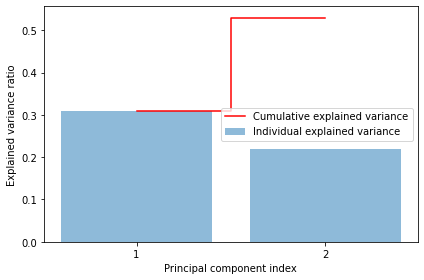

In [107]:
# Create the visualization plot
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, 
        align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, 
         where='mid', c = 'red',label='Cumulative explained variance')
plt.xticks([1,2])
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.tight_layout()
plt.show()

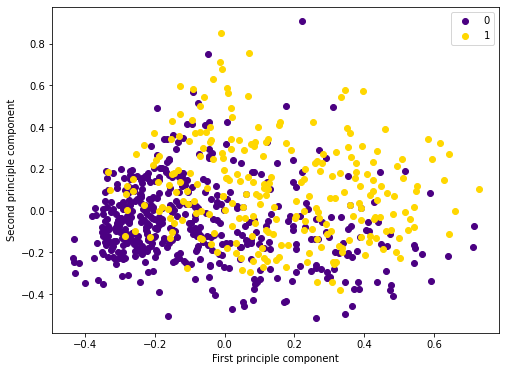

In [108]:
#Display the distribution of first and second principle component
plt.figure(figsize=(8,6))
plt.scatter(data = x_pca_df[x_pca_df['label'] == 0], x = 'component_1', 
            y = 'component_2', c = 'indigo',label = 0)
plt.scatter(data = x_pca_df[x_pca_df['label'] == 1], x = 'component_1', 
            y = 'component_2', c = 'gold',label = 1)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()

In [109]:
factors = pd.DataFrame({
    "feature":X.columns,
    "Component 1": pca.components_[0],   
})

factors = factors.sort_values(by='Component 1', ascending=False)
print(factors)

                    feature  Component 1
7                       Age     0.645338
0               Pregnancies     0.599110
1                   Glucose     0.410231
2             BloodPressure     0.211468
5                       BMI     0.082314
6  DiabetesPedigreeFunction     0.035596
4                   Insulin     0.028734
3             SkinThickness    -0.052240


In [110]:
factors = pd.DataFrame({
    "feature":X.columns,
    "Component 2": pca.components_[1],    
})
factors = factors.sort_values(by='Component 2', ascending=False)
print(factors)

                    feature  Component 2
1                   Glucose     0.567858
3             SkinThickness     0.462724
4                   Insulin     0.422333
5                       BMI     0.351394
6  DiabetesPedigreeFunction     0.235418
2             BloodPressure     0.060273
7                       Age    -0.165292
0               Pregnancies    -0.274234


##Run the best performing model with two principal components

**Using the best overall performing model (from Part 3), execute the same model. Use the same label, but replace the features with the two principle components.** 

Our best performing model is the baseline model (80/20 train/test split) of logistic regression. We will use 2 principal components to run this model again

In [111]:
#insert code here
x = x_pca_df.drop(columns = 'label')
y = x_pca_df['label']
x_train_pca, x_test_pca, y_train_pca, y_test_pca= train_test_split(x,y, 
                                              test_size= 0.20, random_state=0)

log = LogisticRegression(solver= 'liblinear', random_state=0)
log.fit(x_train_pca, y_train_pca)
y_pred_pca = log.predict(x_test_pca) # Predict on the test set
accuracy = accuracy_score(y_test_pca, y_pred_pca) # Get the accuracy score
kappa_scores= cohen_kappa_score(y_test_pca, y_pred_pca) # Get the cohen kappa score
print('80/20 split logistic regression using 2 principal components:')
print(f"The accuracy is {accuracy:.2f}") 
print(f"The kappa score is {kappa_scores:.2f}")

80/20 split logistic regression using 2 principal components:
The accuracy is 0.74
The kappa score is 0.41


**How did the model accuracy using the two principal components compare to the model using all of the features?** 

The accuracy score using the two principal components **(0.74) slightly dropped** compared to the model using all the features **(0.79)**

This decrease in accuracy score may be because of the following reasons:
* As we can see from PCA, variances explained by each component did not dramatically drop after number 2. The two components combined can only explain a total variance of 52.38%, suggesting that we actually lost too much information (not just removing noises) by only keeping two components.
* The size of our dataset is actually quite small (only 724 observations in total). The data fed into training is quite limited, which may lead to potential bias.

##K-Means

**Tune a K-means cluster model on this dataset, using the standardized features. In particular, tune the number of clusters *K* to a level that, in your best judgment, produces representative clusters and appropriate complexity**

In [112]:
# Import KMeans and calculate different number of clusters' sse
df_kmeans = X
k_meansclus = range(1,21)
sse = []

for k in k_meansclus :
  km = KMeans(n_clusters =k,
              init='k-means++',
              n_init=10,
              max_iter=300)
  km.fit(df_kmeans)
  sse.append(km.inertia_)

sse

[157.08119902924432,
 120.41319415949965,
 103.11065779531128,
 95.18355940815218,
 88.54745880324715,
 83.48302718686654,
 78.60131807973264,
 74.96126730377603,
 72.70730796848076,
 70.14040764272491,
 67.0505781969267,
 65.00076887208576,
 63.06508425641228,
 61.05561348479473,
 59.54706725341234,
 58.826243254491715,
 57.83481785562864,
 56.422071877818546,
 55.52778148139319,
 54.46245116239314]

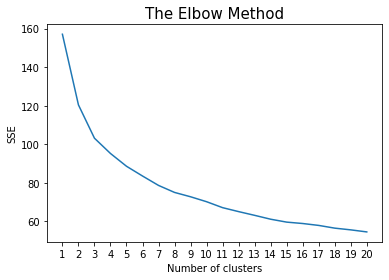

In [113]:
# Use the elbow method to visualize sse
plt.title('The Elbow Method', fontsize = 15)
plt.plot(k_meansclus,sse)
plt.xticks(range(1,21))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

When K = 2, the sse is 120.41, which is a pretty good figure to distinguish clusters.

**Fit the model**

In [114]:
# Fit the K-Means model and show center of each cluster
km = KMeans(n_clusters=2, 
                init='k-means++', 
                n_init=10, 
                max_iter=300
            ).fit(df_kmeans)

centers = km.cluster_centers_
centers

array([[0.4227512 , 0.57989205, 0.54788374, 0.18276147, 0.08609524,
        0.29852872, 0.16689484, 0.41459144],
       [0.11991435, 0.45986047, 0.46416554, 0.23522159, 0.1074587 ,
        0.28803703, 0.17079876, 0.09097074]])

In [115]:
df["Cluster_Prediction"] = km.labels_

accuracy_kmeans = accuracy_score(df['Outcome'],df['Cluster_Prediction'])
print("Accuracy score by applying the kmeans cluster model: ", round(accuracy_kmeans,2))

Accuracy score by applying the kmeans cluster model:  0.33


**Calculate cluster statistics to see how they are differentiated from each other**

In [116]:
# Add the predictions from K-Means model to our dataframe and display 
# differences between clusters

class color:
   BOLD = '\033[1m'
   END = '\033[0m'
for i in range(0, 2):
  df_i = df.loc[df["Cluster_Prediction"] == i]
  print(color.BOLD + f"Cluster {i+1} stats:"+color.END)
  print(f"Percentage of all data: {round(len(df_i)/len(df), 2)}%")
  print(f"Average Age: {round(np.mean(df_i['Age']), 2)}")
  print(f"Average Pregnancies: {round(np.mean(df_i['Pregnancies']), 2)}")
  print(f"Average Glucose: {round(np.mean(df_i['Glucose']), 2)}")
  print(f"Average BloodPressure: {round(np.mean(df_i['BloodPressure']), 2)}")
  print(f"Average SkinThickness: {round(np.mean(df_i['SkinThickness']), 2)}")
  print(f"Average Insulin: {round(np.mean(df_i['Insulin']), 2)}")
  print(f"Average BMI: {round(np.mean(df_i['BMI']), 2)}")
  print(f"Average DiabetesPedigreeFunction: {round(100*np.mean(df_i['DiabetesPedigreeFunction']), 2)}")
  print('\n')


Cluster 1 stats:
Percentage of all data: 0.35%
Average Age: 45.88
Average Pregnancies: 7.19
Average Glucose: 133.88
Average BloodPressure: 77.69
Average SkinThickness: 18.09
Average Insulin: 72.84
Average BMI: 32.8
Average DiabetesPedigreeFunction: 46.89


Cluster 2 stats:
Percentage of all data: 0.65%
Average Age: 26.46
Average Pregnancies: 2.04
Average Glucose: 115.28
Average BloodPressure: 69.49
Average SkinThickness: 23.29
Average Insulin: 90.91
Average BMI: 32.29
Average DiabetesPedigreeFunction: 47.8





**Visualize the clusters. Make sure the binary indicator you created for your label is colored differently**

We have 8 features in the dataset. For displaying purposes, we only choose "Age" and "Glucose" as these two are proven to be the most important ones throughout the analysis

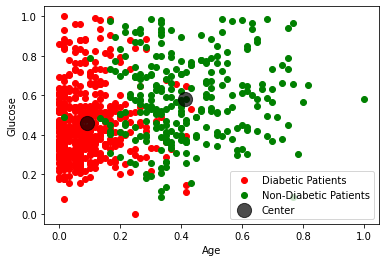

In [117]:
# Use scatter plot to display our clusters
X["Cluster_Prediction"] = km.labels_

df1 = X[X["Cluster_Prediction"]== 1]
df2 = X[X["Cluster_Prediction"]== 0]

plt.scatter(df1['Age'],df1['Glucose'], color='r' , label='Diabetic Patients')
plt.scatter(df2['Age'],df2['Glucose'], color='g', label='Non-Diabetic Patients')
plt.scatter(centers[:, 7], centers[:, 1], c='black', s=200, alpha=0.7, 
            label = 'Center');

plt.legend()
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()